In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from astropy.time import Time

In [2]:
data = list()
with open('../gmat-dslwp-binary/GMAT/R2019aBeta1/output/DSLWP-B_june_2019.gmd') as f:
    for l in f:
        a = list()
        for x in l.split():
            try:
                y = float(x)
            except ValueError:
                pass
            else:
                a.append(y)
        if len(a) == 8:
            a = a[:5] + a[-1:]
        if a:
            data.append(a)
data = np.array(data)

In [3]:
stations = {'PI9CAM' : 22222, 'Shahe' : 33333, 'Harbin' : 44444, 'Wakayama' : 55555}
baselines = {f'{k1}-{k2}' : (v1, v2) for k1,v1 in stations.items() for k2,v2 in stations.items() if v1 < v2}
baselines_coord = list(baselines.keys())

t_tai = Time(data[:,0] + 2430000.0, format = 'jd', scale = 'tai')
t_utc = Time(t_tai, scale = 'utc').datetime64

deltaranges = list()
deltarangerates = list()
for b in baselines:
    sel_baseline = (data[:,2] == baselines[b][0]) & (data[:,4] == baselines[b][1])
    sel_deltarange = (data[:,1] == 9030) & sel_baseline
    sel_deltarangerate = (data[:,1] == 9031) & sel_baseline
    deltaranges.append(xr.DataArray(data[sel_deltarange, -1].reshape((-1,1)),
                 coords = [t_utc[sel_deltarange], [b]], dims = ['time', 'baseline']))
    deltarangerates.append(xr.DataArray(data[sel_deltarangerate, -1].reshape((-1,1)),
                 coords = [t_utc[sel_deltarangerate], [b]], dims = ['time', 'baseline']))
deltarange = xr.concat(deltaranges, dim = 'baseline')
deltarangerate = xr.concat(deltarangerates, dim = 'baseline')

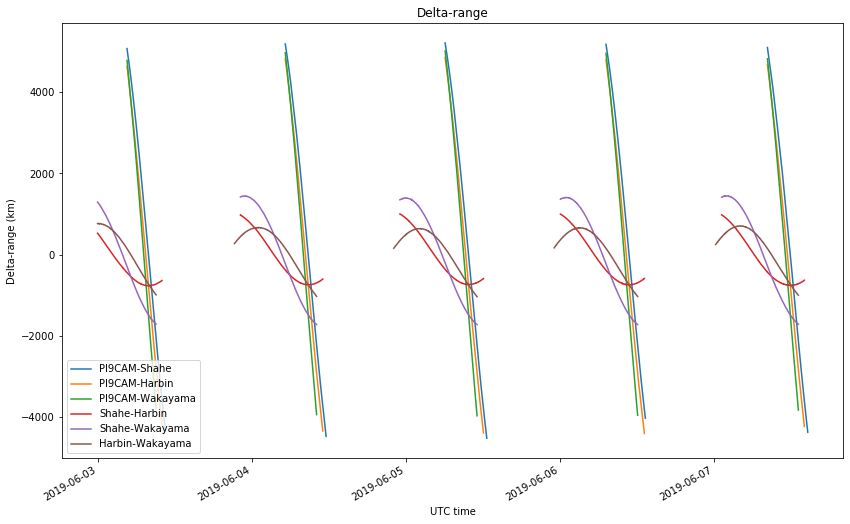

In [4]:
plt.figure(figsize = (14,8), facecolor = 'w')
for b in deltarange.baseline:
    deltarange.sel(baseline = b).plot(label = b.item())
plt.legend()
plt.title('Delta-range')
plt.ylabel('Delta-range (km)')
plt.xlabel('UTC time');

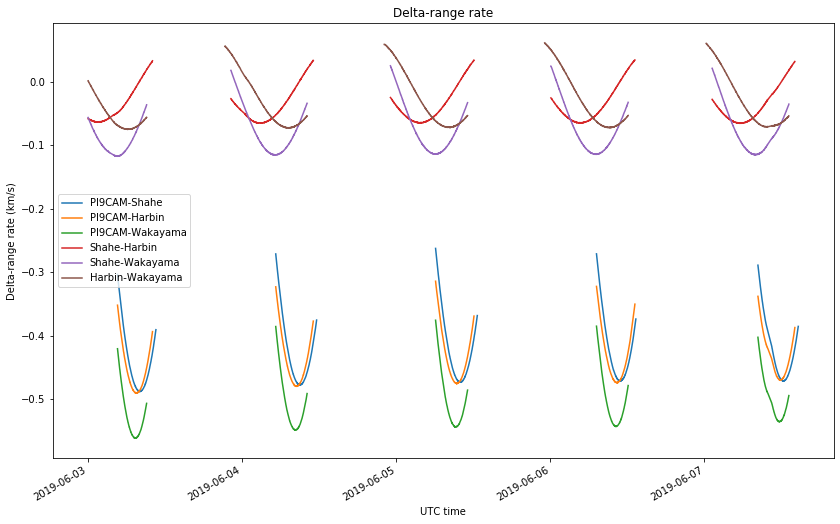

In [5]:
plt.figure(figsize = (14,8), facecolor = 'w')
for b in deltarange.baseline:
    deltarangerate.sel(baseline = b).plot(label = b.item())
plt.legend()
plt.title('Delta-range rate')
plt.ylabel('Delta-range rate (km/s)')
plt.xlabel('UTC time');